<b>2d.i) Read data</b>

First we read the grocery data into a pandas dataframe

In [1]:
import pandas as pd

pd.set_option('display.max_rows', 500)

groc_transact_df = pd.read_csv('data/groceries_dataset.csv')
groc_transact_df.head()

Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk

<b>2d.ii) Exploratory Data Analysis</b>

We first apply <code>.info()</code> to get a big picture idea of the dataset

In [2]:
groc_transact_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


Before we proceed, we make use of <code>groupby()</code> to group the items by date to count the number of transaction in a day. Using this aggregation, we make use of <code>line()</code> in plotly express to plot the number of daily transactions.

In [3]:
# Calculate count of items transacted on every date
plot_transact_df = groc_transact_df.groupby(['Date'])['itemDescription'].count().reset_index()
plot_transact_df.head()  # note that the dates are not sorted

Date  itemDescription
0  01-01-2014               48
1  01-01-2015               48
2  01-02-2014               62
3  01-02-2015               61
4  01-03-2014               54

In [4]:
# Using to_datetime to convert string column to date, we are now able to sort by date
plot_transact_df['Date'] = pd.to_datetime(plot_transact_df['Date'])
plot_transact_df = plot_transact_df.sort_values(by='Date').rename(columns={'itemDescription': 'Num Items Sold'})
plot_transact_df.head()

Date  Num Items Sold
0 2014-01-01              48
2 2014-01-02              62
4 2014-01-03              54
6 2014-01-04              64
8 2014-01-05              44

In [6]:
import plotly.express as px
fig = px.line(plot_transact_df, x='Date', y='Num Items Sold')
fig.show()

<div class="alert alert-block alert-warning">
This serves as a recap and integration of advanced pandas concepts we learnt in Lesson 1, as well as the plotly express library we learnt in Lesson 2.
</div>

To calculate some summary statistics related to datetime, we make use of `'Date'` column as the index:
- Set date as the index of the dataframe, and store that as a new dataframe <code>dateindex_df</code>. 
- Used <code>pd.to_datetime()</code> to change the date index from string datatype into date datatype
- Thereafter, we perform a series of simple numpy and pandas operations to collact some interesting statistics

In [7]:
dateindex_df = groc_transact_df.set_index('Date')        # set 'Date' column as index
dateindex_df.index = pd.to_datetime(dateindex_df.index)  # convert index to datetime type

import numpy as np

# Tabulate interesting statistical summary related to datetime
total_items = len(dateindex_df)
total_days = len(np.unique(dateindex_df.index.date))    # .date is a great tool when index is of type datetime
total_months = len(np.unique(dateindex_df.index.month)) # same for .month!
average_items = total_items / total_days
unique_items = dateindex_df.itemDescription.unique().size

print("There are {} unique items sold ".format(unique_items))
print("Total {} items sold in {} days throughout {} months".format(total_items, total_days, total_months))
print("With an average of {} items sold daily".format(average_items))

There are 167 unique items sold 
Total 38765 items sold in 728 days throughout 12 months
With an average of 53.24862637362637 items sold daily


In [8]:
groc_transact_df.head()

Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk

<div class="alert alert-block alert-warning">
Don't worry about the code, this is actually pretty simple if you take time to look at it carefully. This is just some bonus materials to show how you can apply <code>to_datetime()</code> on date type data to generate datetime-related statistics.</div>

<b>2d.iii) Generate Associations</b>

Before we begin to generate associations, we will need to transform the data into a format which the library we are using accepts. Here we chain a couple of operations to generate a list of transaction of customers. Each list contains all the items which each particular customer buy in the same transaction.

<img src='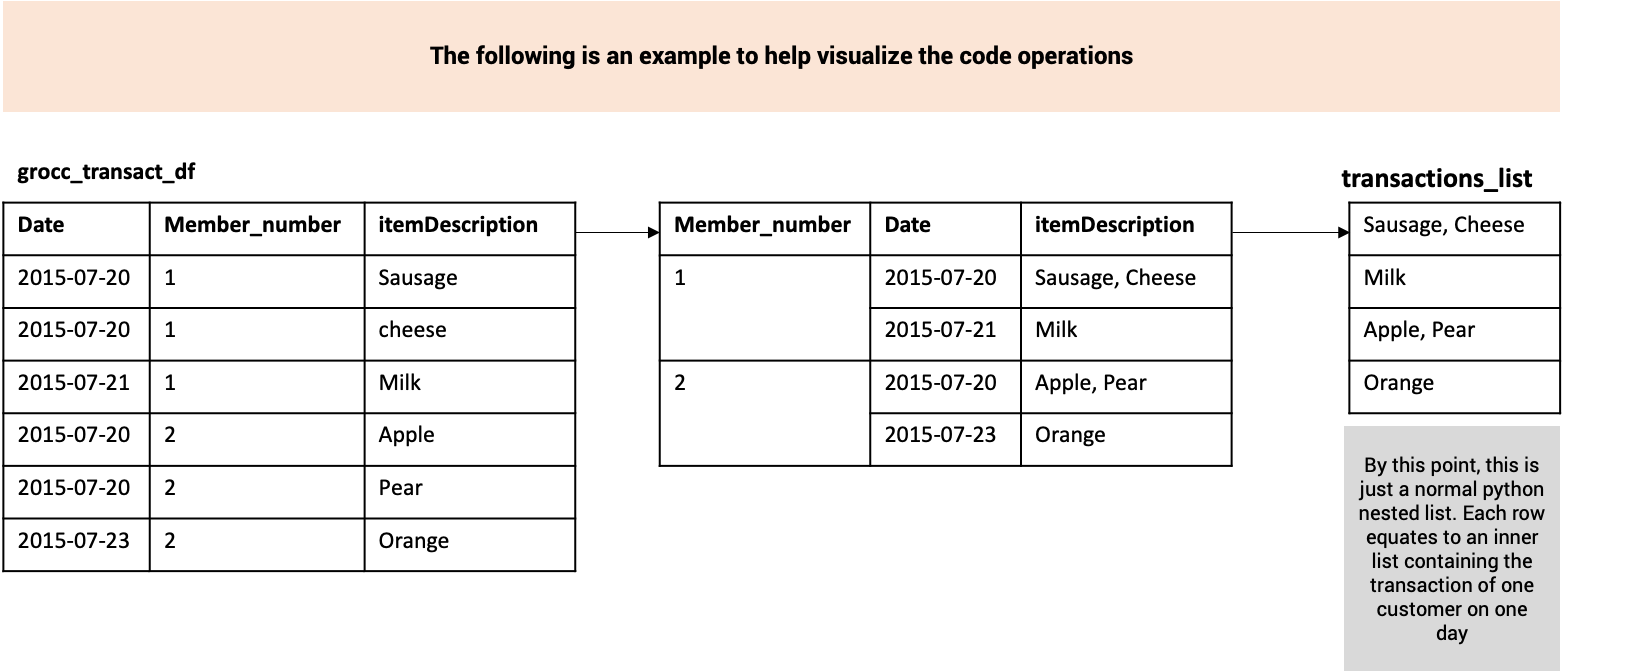
' width='800'/>

In [9]:
grouped_txns = groc_transact_df.groupby(['Member_number','Date'])
grouped_txns  # unfortunately we can't view this object easily, so let's check out the first item in this iterable object

In [10]:
for transaction, items in grouped_txns:
    print(transaction)
    print(items)
    break  # this is necessary as there are so many transactions in the dataframe!

(1000, '15-03-2015')
       Member_number        Date      itemDescription
4843            1000  15-03-2015              sausage
8395            1000  15-03-2015           whole milk
20992           1000  15-03-2015  semi-finished bread
24544           1000  15-03-2015               yogurt


In [11]:
# We build a 2-dimensional list, where every row is a unique transaction by a member, containing a list of items bought
transactions_list = [list(items['itemDescription']) for txn, items in groc_transact_df.groupby(['Member_number','Date'])]
transactions_list[:20]

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frozen vegetables', 'other vegetables'],
 ['butter', 'whole milk'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['sausage', 'rolls/buns'],
 ['root vegetables', 'detergent'],
 ['frozen meals', 'dental care'],
 ['rolls/buns', 'rolls/buns'],
 ['dish cleaner', 'cling film/bags'],
 ['canned beer', 'frozen fish']]

Next we transform the data by using <code>.fit().transform()</code> from the  <code>mlxtend</code> library, which is the main library we will use later on to perform the association mining. 

You can find out more at: http://rasbt.github.io/mlxtend/user_guide/preprocessing/TransactionEncoder/

<img src='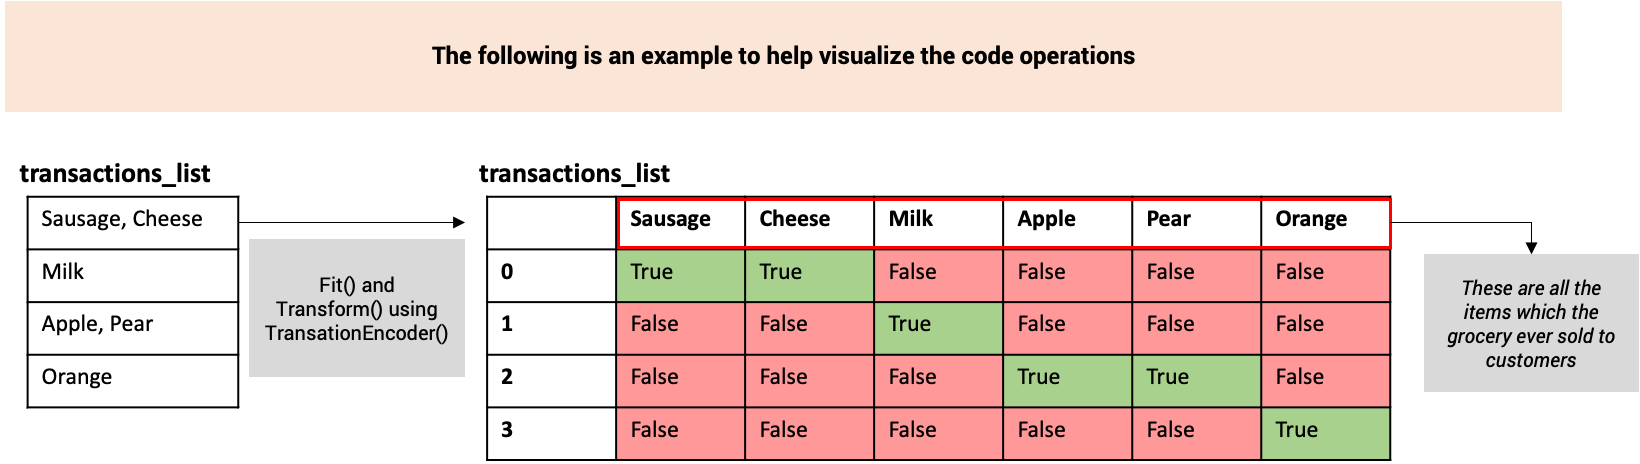
' width='800'/>

In [12]:
# !pip install mlxtend

You should consider upgrading via the 'C:\Users\Acer\anaconda3\python.exe -m pip install --upgrade pip' command.


In [18]:
from mlxtend.preprocessing import TransactionEncoder

# We create an instance of the TransactionEncoder
encoder = TransactionEncoder()


# We fit and transform the data into a format friendly for the algorithm
boolean_matrix = encoder.fit(transactions_list).transform(transactions_list)
transactions_ohe_df = pd.DataFrame(boolean_matrix, columns=encoder.columns_)
transactions_ohe_df

Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
0                      False     False             False             False   
1                      False     False             False             False   
2                      False     False             False             False   
3                      False     False             False             False   
4                      False     False             False             False   
...                      ...       ...               ...               ...   
14958                  False     False             False             False   
14959                  False     False             False             False   
14960                  False     False             False             False   
14961                  False     False             False             False   
14962                  False     False             False             False   

       baby cosmetics   bags  baking powder  bathroom cleaner   beef  berries  \
0               False  False          False             False  False    False   
1               False  False          False             False  False    False   
2               False  False          False             False  False    False   
3               False  False          False             False  False    False   
4               False  False          False             False  False    False   
...               ...    ...            ...               ...    ...      ...   
14958           False  False          False             False  False     True   
14959           False  False          False             False  False    False   
14960           False  False          False             False  False    False   
14961           False  False          False             False  False    False   
14962           False  False          False             False  False    False   

       ...  turkey  vinegar  waffles  whipped/sour cream  whisky  white bread  \
0      ...   False    False    False               False   False        False   
1      ...   False    False    False               False   False        False   
2      ...   False    False    False               False   False        False   
3      ...   False    False    False               False   False        False   
4      ...   False    False    False               False   False        False   
...    ...     ...      ...      ...                 ...     ...          ...   
14958  ...   False    False    False               False   False        False   
14959  ...   False    False    False               False   False        False   
14960  ...   False    False    False               False   False        False   
14961  ...   False    False    False               False   False        False   
14962  ...   False    False    False               False   False        False   

       white wine  whole milk  yogurt  zwieback  
0           False        True    True     False  
1           False        True   False     False  
2           False       False   False     False  
3           False       False   False     False  
4           False       False   False     False  
...           ...         ...     ...       ...  
14958       False       False    True     False  
14959       False       False   False     False  
14960       False       False   False     False  
14961       False       False   False     False  
14962       False       False   False     False  

[14963 rows x 167 columns]

To construct association rules between elements or items, the algorithm considers 3 important factors which are, support, confidence and lift. Each of these factors is explained as follows:

- <b>Support:</b> The support of item I is defined as the ratio between the number of transactions containing the item I by the total number of transactions expressed as :

    - Support(I) = Number of transactions containing I / Total number of Transactions<br><br>

- <b>Confidence:</b> This is measured by the proportion of transactions with item I1, in which item I2 also appears. The confidence between two items I1 and I2, in a transaction is defined as the total number of transactions containing both items I1 and I2 divided by the total number of transactions containing I1.

    - Confidence(I1->I2) = Number of Transactions containing I1 and I2 / (Total Number of Transactions containing I1)<br><br>

- <b>Lift:</b> Lift is the ratio between the confidence and support expressed as:
    - Lift(I1->I2) = Confidence(I1->I2) / Support(I2) <br>
    
The list generate below are the itemsets which frequently occur together. Here, you have to set the <code>min_support</code> to tell the algorithm to filter away items relationship pairing that has a lower support than say - 0.001 (in the example below).

2d.iv) Using the mlxtend library for Market Basket Analysis [Student Exercise]
---

<div class="alert alert-block alert-info">
    
<b>Background:</b><br>
    
- You have been introduced a new library, <b>mlxtend</b> which provides many useful Machine Learning extensions for day-to-day data science tasks.<br>
    
<b>User story:</b><br>
- You would like to use the <code>apriori()</code> method with a minimum support threshold of 1% (i.e. 0.01).<br>
- Some parameters that may be of interest: <code>use_colnames</code> and <code>verbose</code>. [Documentation](http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.frequent_patterns/)<br>
- Play around with <code>min_support</code> threshold and observe the output. As the threshold decreases, are there more or less items in the results?<br><br>
    
- Expected Output (first 5 rows):<br><br>

    
<div style="background:white">
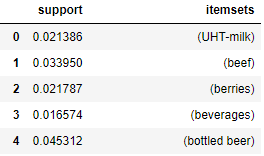
    
</div>
</div>

In [36]:
from mlxtend.frequent_patterns import apriori, association_rules  # we will use association_rules in the next exercise

## Write your code here
answer = apriori(transactions_ohe_df, min_support = 0.01, use_colnames = True, verbose = 1)
answer.head()


Processing 18 combinations | Sampling itemset size 3 2


support        itemsets
0  0.021386      (UHT-milk)
1  0.033950          (beef)
2  0.021787       (berries)
3  0.016574     (beverages)
4  0.045312  (bottled beer)

<div class="alert alert-block alert-warning">
Refer to the diagram from part 2c to recap on the concepts of support, lift and confidence.</div>

We can then use the <code>association_rules()</code> method to generate the rules capturing the relationship between each item. To find out more about what other parameters you can pass to the <code>association_rules()</code> method, you can check out:<br><br> http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/

2d.v) Using the mlxtend library for Market Basket Analysis [Student Exercise]
---

<div class="alert alert-block alert-info">
    
<b>Background:</b><br>
    
- You have been introduced a new library, <b>mlxtend</b> which provides many useful Machine Learning extensions for day-to-day data science tasks.<br>
    
<b>User story:</b><br>
- You would like to use the <code>association_rules()</code> method with a confidence threshold of 1% (i.e. 0.01).<br>
- Some parameters that may be of interest: <code>metric</code> and <code>min_threshold</code>. [Documentation](http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.frequent_patterns/)<br>
- Play around with <code>min_threshold</code> and observe the output. As the threshold decreases, are there more or less items in the results?<br><br>
    
- Expected Output (sort min_threshold in descending order):<br><br>

    
<div style="background:white">
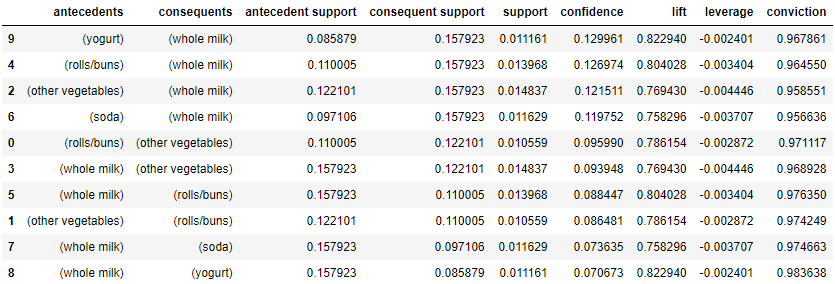
    
</div>
</div>

In [39]:
## Write your code here
answers = association_rules(answer, min_threshold = 0.01, metric = 'confidence')
result = answers.sort_values(by = 'confidence', ascending = False)
result.head()



antecedents         consequents  antecedent support  \
9            (yogurt)        (whole milk)            0.085879   
4        (rolls/buns)        (whole milk)            0.110005   
3  (other vegetables)        (whole milk)            0.122101   
7              (soda)        (whole milk)            0.097106   
0        (rolls/buns)  (other vegetables)            0.110005   

   consequent support   support  confidence      lift  leverage  conviction  
9            0.157923  0.011161    0.129961  0.822940 -0.002401    0.967861  
4            0.157923  0.013968    0.126974  0.804028 -0.003404    0.964550  
3            0.157923  0.014837    0.121511  0.769430 -0.004446    0.958551  
7            0.157923  0.011629    0.119752  0.758296 -0.003707    0.956636  
0            0.122101  0.010559    0.095990  0.786154 -0.002872    0.971117

<div class="alert alert-block alert-warning">
How would you interpet the association rules in the table above?</div>

3.Recommender Systems
===
***

3a. What are Recommender Systems?
---

Recommender systems have many applications that I’m sure you’re already familiar with. Indeed, Recommender systems are usually at play on many websites. For example, suggesting books on Amazon and movies on Netflix. In fact, everything on Netflix’s website is driven by customer selection. If a certain movie gets viewed frequently enough, Netflix’s recommender system ensures that that movie gets an increasing number of recommendations. Another example can be found in a daily-use mobile app, where a recommender engine is used to recommend anything from where to eat or what job to apply to. On social media, sites like Facebook or LinkedIn, regularly recommend friendships.

Recommender systems are even used to personalize your experience on the web. For example, when you go to a news platform website, a recommender system will make note of the types of stories that you clicked on and make recommendations on which types of stories you might be interested in reading in the future. There are many of these types of examples and they are growing in number every day.

One of the main advantages of using recommendation systems is that users get broader exposure to many different products they might be interested in. This exposure encourages users towards the continual usage or purchase of their products. Not only does this <b>provide a better experience for the user but it benefits the service provider, as well, with increased potential revenue and better security for its customers</b>

<img src='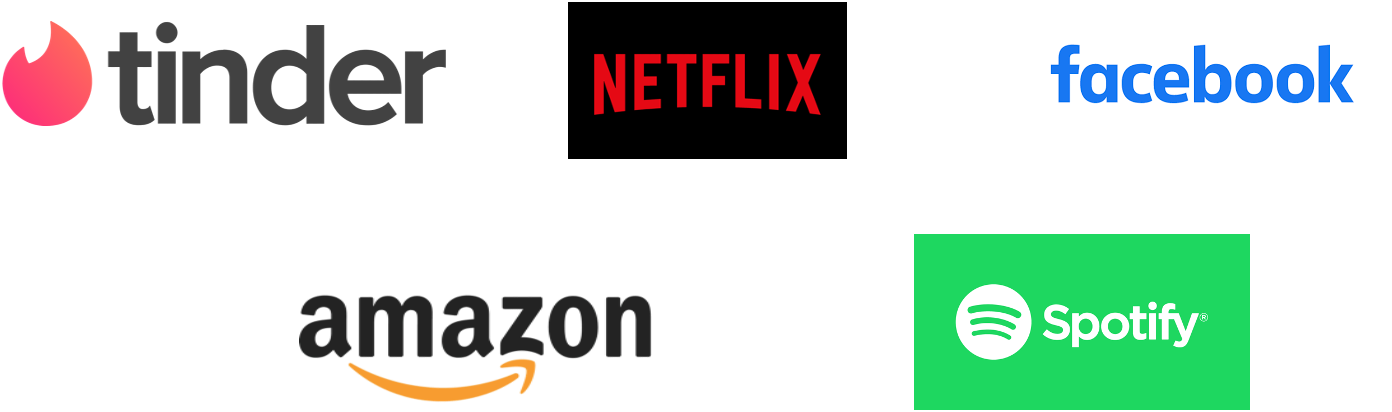
' width='600'/>

<div class="alert alert-block alert-warning">
Isn't it incredible how recommender systems have permeated the different spheres of our lives-  From entertainment to the social aspect!</div>

3b. Types of Recommender Systems
---

There are generally 2 main types of recommendation systems: Content-based and collaborative filtering. The main difference between each can be summed up by the type of statement that a consumer might make. For instance, the main paradigm of a content-based recommendation system is driven by the statement: “Show me more of the same of what I’ve liked before.”

- <b>Content-based systems</b> try to figure out what a user’s favorite aspects of an item are, and then make recommendations on items that share those aspects. Collaborative filtering is based on a user saying, “Tell me what’s popular among my neighbours because I might like it too.” <br><br>

- <b>Collaborative filtering</b> techniques find similar groups of users and provide recommendations based on similar tastes within that group. In short, it assumes that a user might be interested in what similar users are interested in. 

<img src='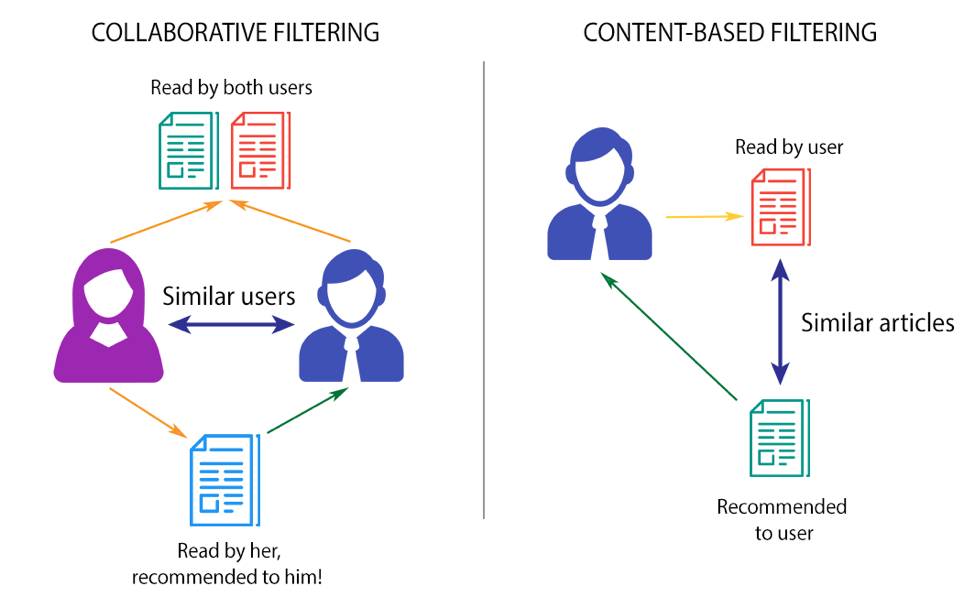
' width='800'/>


There are also hybrid recommender systems that combine various mechanisms. However the <b>focal point of this lesson will be on the collaborative filtering approach</b>.

In terms of implementing recommender systems, there are 2 types: memory-based and model-based. 

- In memory-based approaches, we use the entire user-item dataset to generate a recommendation system. It uses statistical techniques to approximate users or items. Examples of these techniques include Pearson Correlation, Cosine Similarity, Euclidean Distance, and among others. <br><br>

- In model-based approaches, a model of users is developed in an attempt to learn their preferences. Models can be created using machine learning techniques like regression, clustering, classification, and so on.

<div class="alert alert-block alert-warning">
What are some examples of platforms which users collaborative filtering and content filtering respectively?</div>

3c. Concept and Mechanism of Collaborative Filtering
---

Collaborative filtering is based on the fact that <b>relationships exist between products and people’s interests</b>. Many recommendation systems <b>use collaborative filtering to find these relationships and to give an accurate recommendation</b> of a product that the user might like or be interested in. <br>

Collaborative filtering has basically two approaches: user-based and item-based:
- User-based collaborative filtering is based on the user similarity or neighborhood. 
- Item-based collaborative filtering is based on similarity among items. 

Before we explain the difference between the two, let's dive into the mechanism behind User-based collaborative filtering. You will be able to better understand Item-based collaborative filtering then.

<div class="alert alert-block alert-warning">
Note that Content-based filtering and Item-based collaborative filtering are very different! We chose to focus on User-based collaborative filtering as this is the more mainstream approach which many of the leading tech firms are adopting.</div>

In user-based collaborative filtering, we have an active user for whom the recommendation is aimed at. 

- The collaborative filtering engine first looks for users who are similar to that particular active user, that is, users who share the active user’s rating patterns. <br><br>
- Collaborative filtering bases this <b>similarity on things like history, preference, and choices that users make when buying, watching, or enjoying</b> something, for example, movies that similar users have rated highly. <br><br>
- Then it uses the ratings from these similar users to predict the possible ratings by the active user for a movie that they had not previously watched. For instance, if two users are similar or, are neighbors in terms of their interested movies, we can recommend a movie to the active user that their neighbor has already seen.

<img src='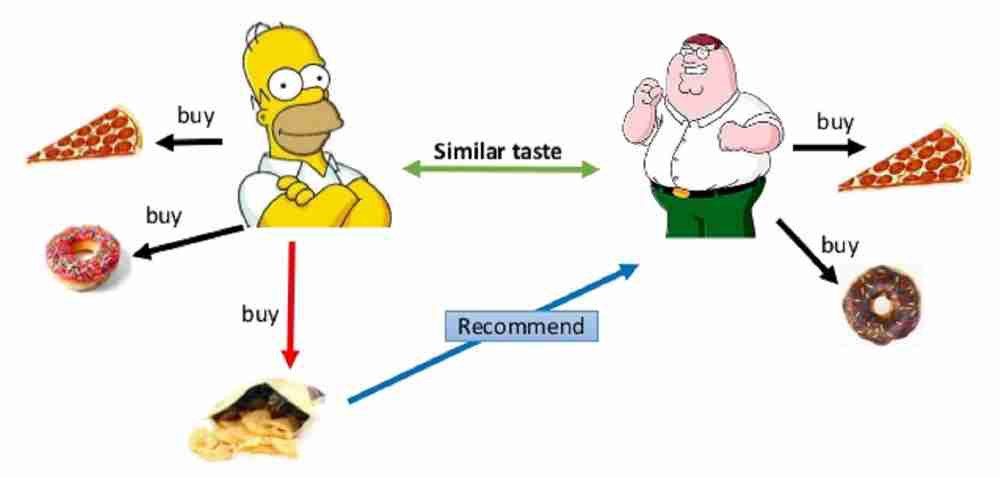
' width='600'/>

Here, we will use a movie recommender as an example (imagine you were building the first version of Netflix), and go through the board steps in an <b>user-based collaborative filtering</b>:

i) Create user ratings matrix<br>
ii) Learn the similarity weights<br>
iii) Creating the weighted ratings matrix<br>
iv) Generate recommendation matrix<br>

<b>3c.i) Create user ratings matrix</b>

To create a user-based collaborative filtering recommender system, we will need to collate the user ratings.

Here assume that we have a simple user-item matrix (think of it as a fancy dataframe), which shows the ratings of four users for five different movies. Let’s also assume that our active user has watched and rated three out of these five movies. Let’s find out which of the two movies that our active user hasn’t watched should be recommended to her.

<img src='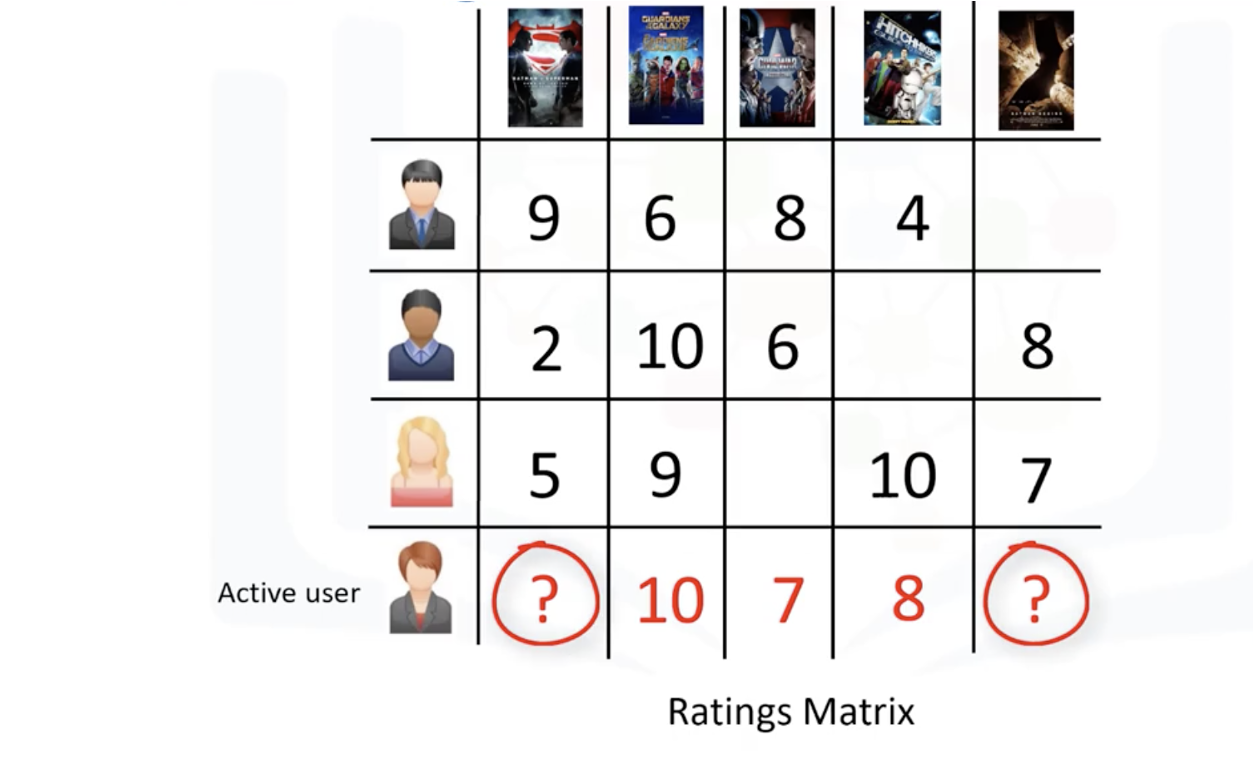
' width='800'/>

<b>3c.ii) Learn the similarity weights</b>

Before we do any recommendations, the first step is to discover <b>how similar the active user is to the other users. </b> How do we do this? Well, this can be done through several different statistical and vectorial techniques such as distance or similarity measurements including:
- Euclidean Distance, 
- Pearson Correlation, 
- Cosine Similarity, and so on. 

To calculate the level of similarity between two users, we use the three movies that both the users have rated in the past. Regardless of what we use for similarity measurement, for example, the similarity could be 0.7, 0.9, and 0.4 between the active user and other users. 

These numbers <b>represent similarity weights or proximity of the active user to other users</b> in the dataset. 


<img src='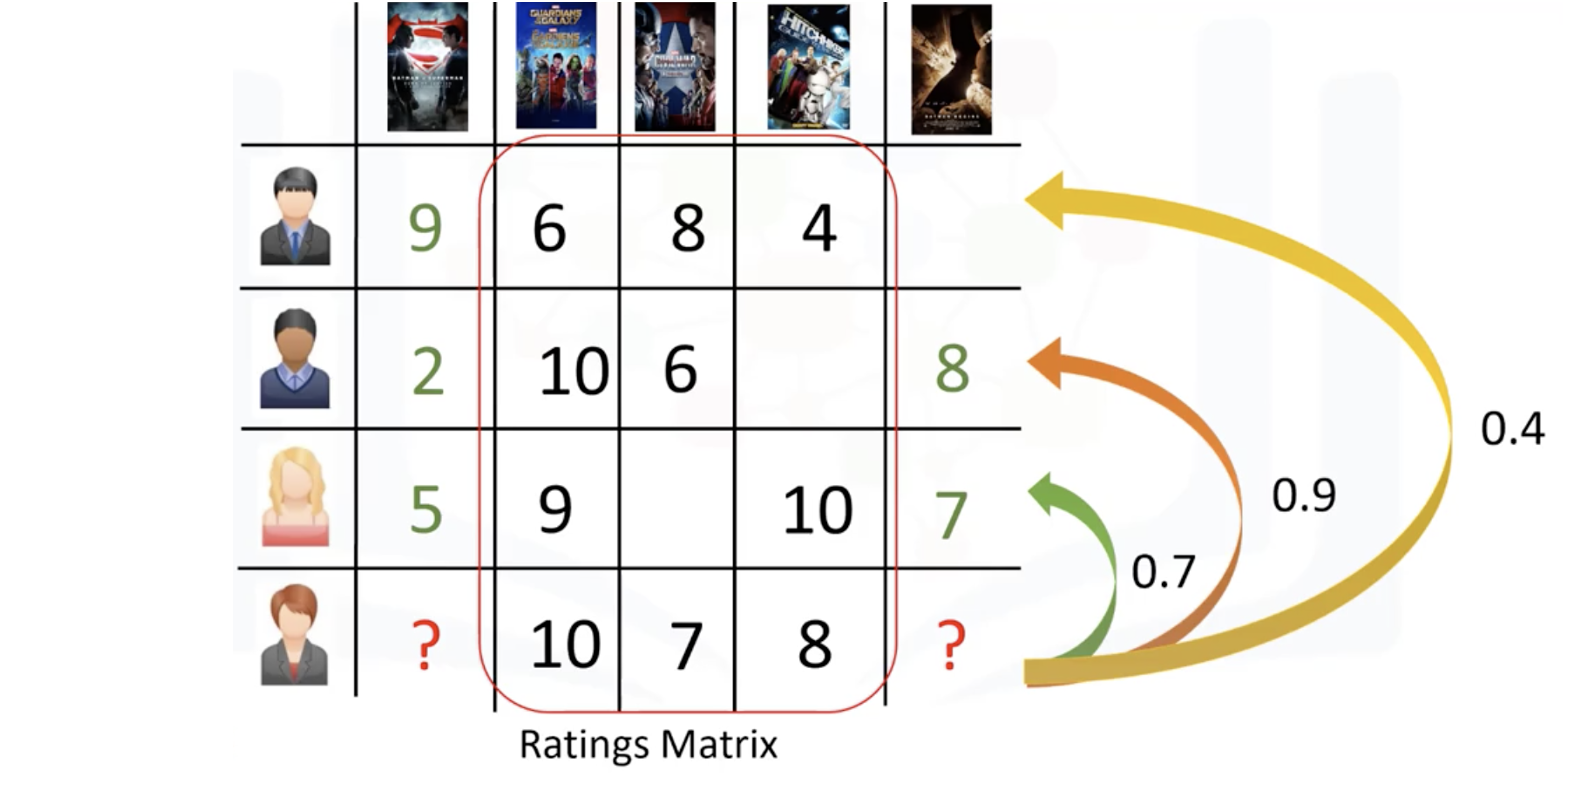
' width='600'/>

<b>3c.iii) Creating the weighted ratings matrix</b>



The next step is to create a weighted rating matrix. We just calculated the similarity of users to our active user in the diagram below; now, we can use it to <b>calculate the possible opinion of the active user about our two target movies</b>. This is achieved by multiplying the similarity weights to the user ratings.<br>

It results in a weighted ratings matrix, which represents the user’s neighbours’ opinions about our two candidate movies for recommendation. In fact, it incorporates the behaviour of other users and gives more weight to the ratings of those users who are more similar to the active user.<br>

<img src='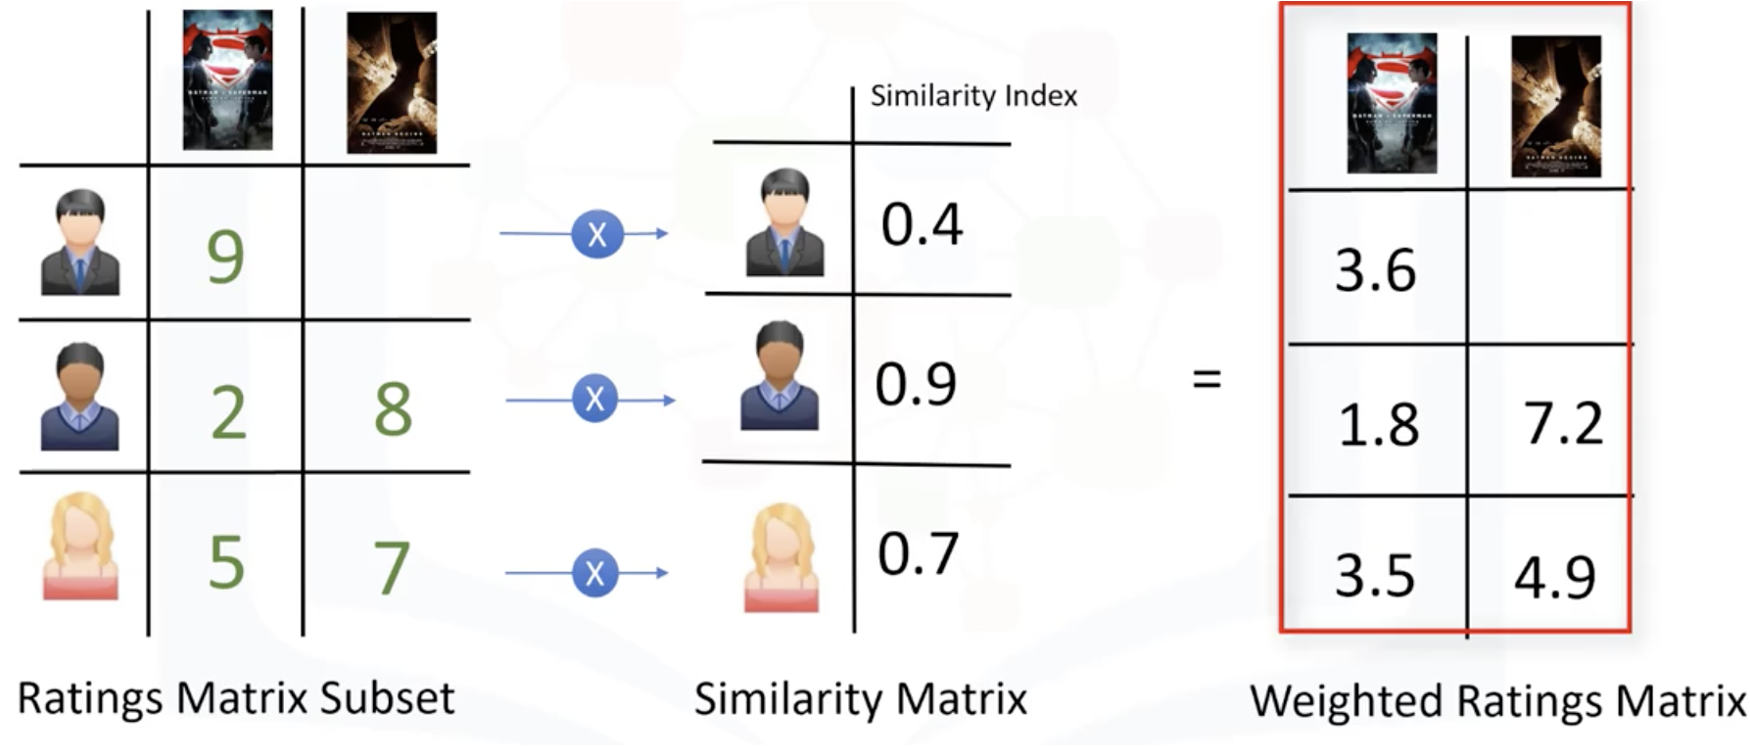
' width='600'/>

<b>3c.iv) Generate recommendation matrix</b>

Now, we can generate the recommendation matrix by aggregating all of the weighted rates. However, as three users rated the first potential movie and two users rated the second movie, we have to normalize the weighted rating values. We do this by dividing the sum of weighted ratings by the sum of the similarity index for users.

<img src='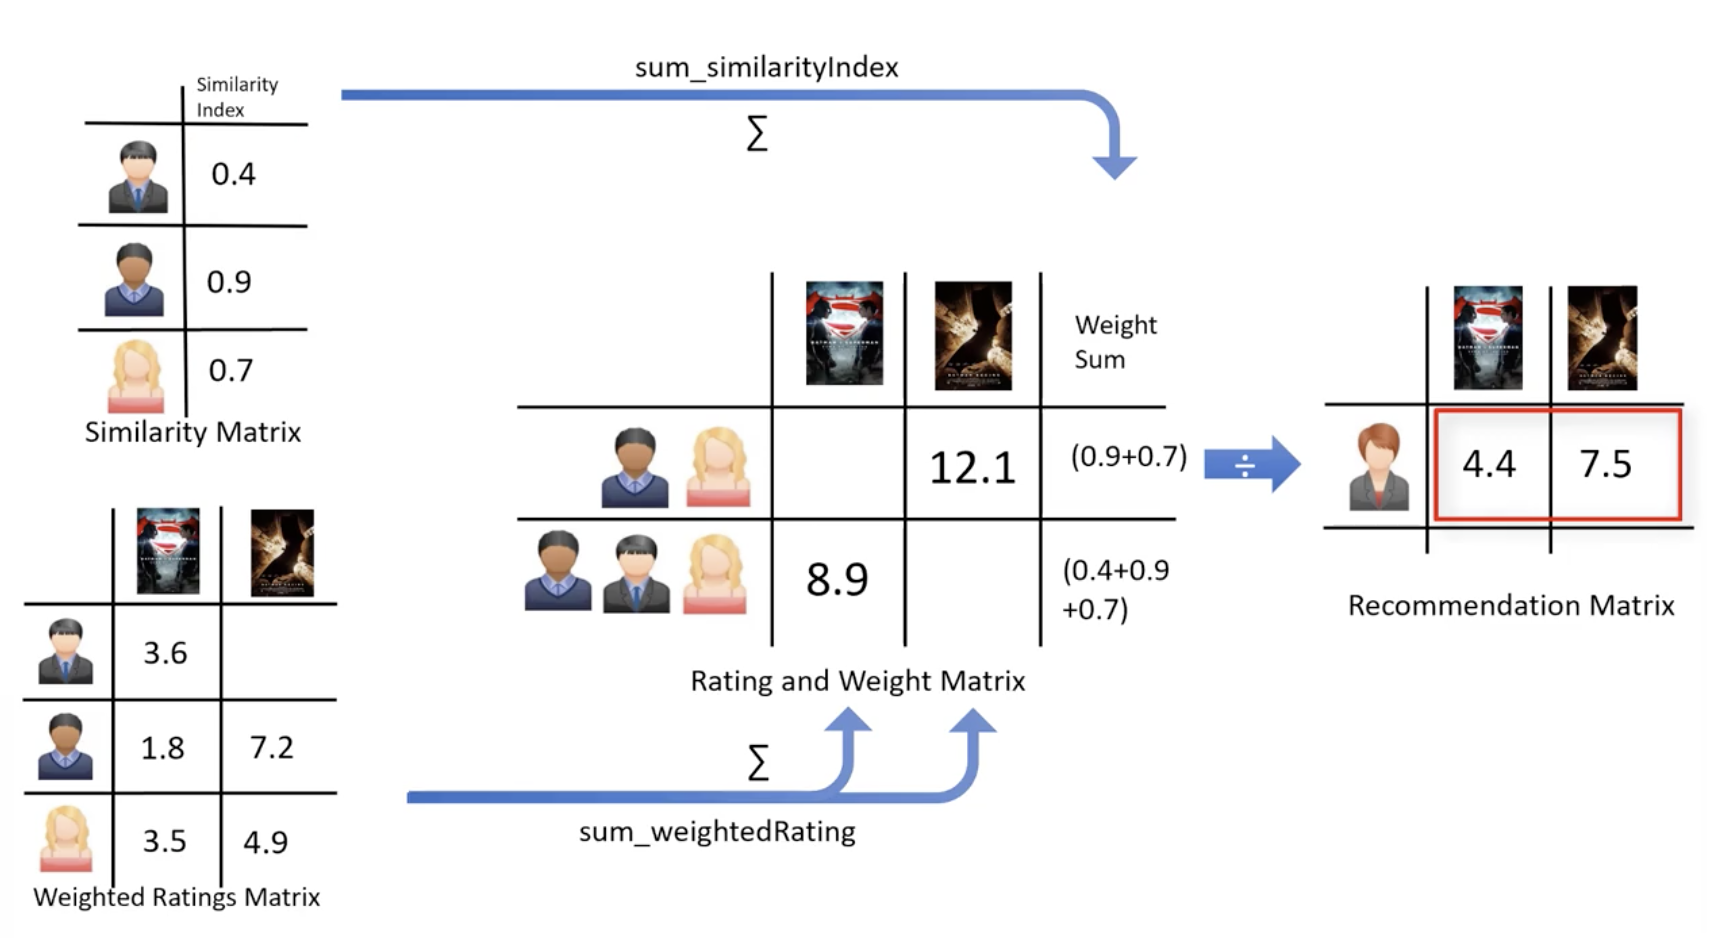
' width='600'/>

The difference between User-based collaborative filtering and Item-based collaborative filtering is as such:
    
- In the user-based approach, the recommendation is based on users of the same neighbourhood with whom he or she shares common preferences. For example, as User 1 and User 3 both liked Item 3 and Item 4, we consider them as similar — or neighbour users — and recommend Item 1 which is positively rated by User 1 to User 3.<br><br>

- In the item-based approach, similar items build neighbourhoods on the behaviour of users (not based on their contents!). For example, Item 1 and Item 3 are considered neighbours as they were positively rated by both User 1 and User 2. So, Item 1 can be recommended to User 3 as he or she has already shown interest in Item 3. Therefore, the recommendations here are based on the items in the neighborhood that a user might prefer.

<img src='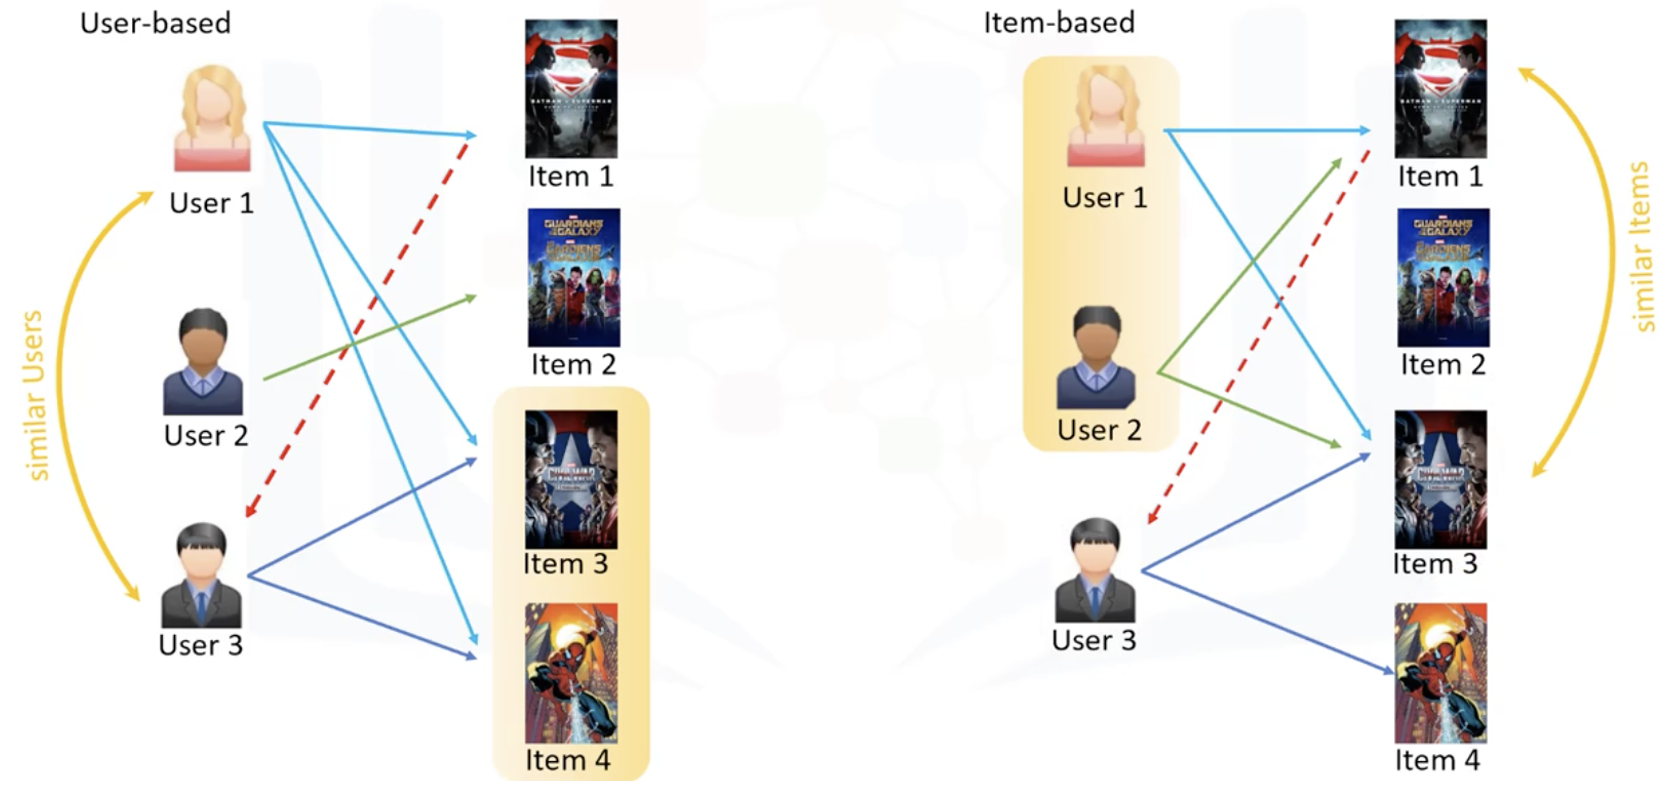
' width='600'/>

3d. Implementation of Collaborative Filtering [Bonus]
---

In this section we will go through the following workflow:<br><br>
i) Read data<br>
ii) Data Preparation<br>
iii) Create User input to test recommender system<br>
iv) Create user ratings matrix<br>
v) Learn the similarity weights<br>
vi) Creating the Weighting Rating Matrix<br>
vii) Generate recommendation matrix<br>
viii) Generate recommendations<br>

<b>3d.i) Read data</b>

First we read the movies and ratings data into pandas dataframe

In [49]:
#Store the movie information into a pandas dataframe
movies_df = pd.read_csv('data/movies.csv')
movies_df.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [48]:
#Store the user information into a pandas dataframe
ratings_df = pd.read_csv('data/ratings.csv')
ratings_df.head()

userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

<b>3d.ii) Data Preparation</b>

So each movie has a unique ID, a title with its release year along with it (which may contain unicode characters), and several different genres in the same field. Let’s remove the <code>year</code> from the <code>title</code> column and store it a new <code>year</code> column by using the handy <code>extract()</code> function that Pandas has.

In [50]:
#Using regular expressions to find a year stored between parentheses
#We specify the parantheses so we don’t conflict with movies that have years in their titles
movies_df['year'] = movies_df.title.str.extract('(\(\d\d\d\d\))',expand=False)

#Removing the parentheses
movies_df['year'] = movies_df.year.str.extract('(\d\d\d\d)',expand=False)

#Removing the years from the ‘title’ column
movies_df['title'] = movies_df.title.str.replace('(\(\d\d\d\d\))', '')

#Applying the strip function to get rid of any ending whitespace characters that may have appeared
movies_df['title'] = movies_df['title'].apply(lambda x: x.strip())

movies_df.head()

movieId                        title  \
0        1                    Toy Story   
1        2                      Jumanji   
2        3             Grumpier Old Men   
3        4            Waiting to Exhale   
4        5  Father of the Bride Part II   

                                        genres  year  
0  Adventure|Animation|Children|Comedy|Fantasy  1995  
1                   Adventure|Children|Fantasy  1995  
2                               Comedy|Romance  1995  
3                         Comedy|Drama|Romance  1995  
4                                       Comedy  1995

With that, let’s also drop the <code>genres</code> column since we won’t need it for this particular recommendation system:

In [51]:
#Dropping the genres column
movies_df = movies_df.drop('genres',axis=1)

movies_df.head()

movieId                        title  year
0        1                    Toy Story  1995
1        2                      Jumanji  1995
2        3             Grumpier Old Men  1995
3        4            Waiting to Exhale  1995
4        5  Father of the Bride Part II  1995

<b>3d.iii) Create User input to test recommender system</b>

Now we are going to start building our recommender system. Let’s begin by creating an input user to recommend movies to:

In [52]:
user_input = [
    {'title':'Breakfast Club, The', 'rating':5},
    {'title':'Toy Story', 'rating':3.5},
    {'title':'Jumanji', 'rating':2},
    {'title':'Pulp Fiction', 'rating':5},
    {'title':'Akira', 'rating':4.5}
]
movie_ratings_input = pd.DataFrame(user_input)
movie_ratings_input

title  rating
0  Breakfast Club, The     5.0
1            Toy Story     3.5
2              Jumanji     2.0
3         Pulp Fiction     5.0
4                Akira     4.5

<div class="alert alert-block alert-warning">
Want to add more movies to your custom user input? Simply increase the amount of elements in the userInput. Feel free to add movies to your liking. Just be sure to write it in with capital letters and if a movie starts with a “The”, like “The Matrix” then write it in like this: ‘Matrix, The’</div>

With the input complete, let’s extract the input movies’ ID’s from the movies dataframe and add them into it.
We can achieve this by first filtering out the rows that contain the input movies’ title and then merging this subset with the input dataframe. We also drop unnecessary columns for the input to save memory space.

In [53]:
# Filtering out the movie titles from movies_df, so we can get the movieIds
filtered_movies_df = movies_df[movies_df['title'].isin(movie_ratings_input['title'].tolist())]
movie_ratings_input = pd.merge(filtered_movies_df, movie_ratings_input)  # we merge userInput and movies_df by title

# Drop info that we won’t use from the input dataframe
movie_ratings_input = movie_ratings_input.drop('year', 1)


### Final input dataframe
# If a movie you added in above isn’t here, then it might not be in the original
# dataframe or it might spelled differently, please check capitalisation.

movie_ratings_input

movieId                title  rating
0        1            Toy Story     3.5
1        2              Jumanji     2.0
2      296         Pulp Fiction     5.0
3     1274                Akira     4.5
4     1968  Breakfast Club, The     5.0

<b>3d.iv) Create user ratings matrix</b>

Now with the movieId in our input, we can now get the subset of users that have watched and reviewed the movies in our input.

In [54]:
# Filtering out users that have watched movies the same movies as userInput and storing it
userSubset = ratings_df[ratings_df['movieId'].isin(movie_ratings_input['movieId'])]
userSubset.head()

userId  movieId  rating  timestamp
0         1        1     4.0  964982703
16        1      296     3.0  964982967
320       4      296     1.0  945173350
422       4     1968     4.0  986934786
516       5        1     4.0  847434962

We now group up the rows by <code>userId</code>, and sort these groups so the users that share the most movies in common with the input have higher priority. This provides a richer recommendation since we won’t go through every single user.

In [55]:
# Groupby creates several sub dataframes where they all have the same value in the column specified as the parameter
userSubsetGroup = userSubset.groupby('userId')
userSubsetGroup = sorted(userSubsetGroup, key=lambda x: len(x[1]), reverse=True)  # sort users by num movies watched 
userSubsetGroup

[(91,
         userId  movieId  rating   timestamp
  14121      91        1     4.0  1112713037
  14122      91        2     3.0  1112713392
  14173      91      296     4.5  1112711264
  14316      91     1274     5.0  1112713057
  14383      91     1968     3.0  1112713409),
 (177,
         userId  movieId  rating   timestamp
  24900     177        1     5.0  1435533535
  24901     177        2     3.5  1435534109
  24930     177      296     5.0  1435530409
  25069     177     1274     2.0  1435535036
  25129     177     1968     3.5  1435534080),
 (219,
         userId  movieId  rating   timestamp
  31524     219        1     3.5  1194681084
  31525     219        2     2.5  1194740185
  31554     219      296     4.0  1198522553
  31628     219     1274     2.5  1194686351
  31680     219     1968     3.0  1194931899),
 (274,
         userId  movieId  rating   timestamp
  39229     274        1     4.0  1171410158
  39230     274        2     3.5  1171934785
  39288     274      2

<b>3d.v) Learn the similarity weights</b>

Next, we are going to compare all users to our specified user and find users that are most similar using the Pearson Correlation Coefficient. In this case we will select a subset of users (first 100) to iterate through. This limit is imposed so we can focus on the users that have most impact, and to save computation time.

In [56]:
userSubsetGroup = userSubsetGroup[0:100]

Now, we calculate the Pearson Correlation between input user and subset group, and store it in a dictionary, where the key is the <code>userId</code> and the value is the coefficient.

In [57]:
from math import sqrt

#Store the Pearson Correlation in a dictionary, where the key = user Id and the value = correlation with userInput
pearson_correlation_dict = {}

#For every user group in our subset... name = userId, group = df of all movies he/she has watched
for name, group in userSubsetGroup:
    
    #Let’s start by sorting the movieIds in userInput and this current user for comparison/calculation later
    movie_ratings_input = movie_ratings_input.sort_values(by='movieId')
    group = group.sort_values(by='movieId')
    
    #Get the N for the formula
    nRatings = len(group)
    
    #Get movie review scores for movies that both this user & userInput have in common
    input_df = movie_ratings_input[movie_ratings_input['movieId'].isin(group['movieId'])]
    input_ratings = input_df['rating']
    
    #Save this user's reviews
    user_ratings = group['rating']
    
    # Now let’s calculate the pearson correlation between two users, aka User x (input user) and User y (current user)
    Sxx = sum([i**2 for i in input_ratings]) - pow(sum(input_ratings),2) / float(nRatings)
    Syy = sum([i**2 for i in user_ratings]) - pow(sum(user_ratings),2) / float(nRatings)
    Sxy = sum( i*j for i, j in zip(input_ratings, user_ratings)) - sum(input_ratings)*sum(user_ratings)/float(nRatings)
    
    # If the denominator isn't zero, then divide, else, there is 0 correlation.
    if Sxx != 0 and Syy != 0:
        pearson_correlation_dict[name] = Sxy/sqrt(Sxx*Syy)
    else:
        pearson_correlation_dict[name] = 0

Converting the dictionary to a dataframe:

In [58]:
similarity_df = pd.DataFrame.from_dict(pearson_correlation_dict, orient='index')
similarity_df = similarity_df.reset_index().rename(columns={0: 'correlation', 'index': 'userId'})
similarity_df.head()

userId  correlation
0      91     0.438529
1     177     0.000000
2     219     0.451243
3     274     0.716115
4     298     0.959271

Now let’s get the top 50 users that are most similar to the input:

In [59]:
top50_similar_users = similarity_df.sort_values(by='correlation', ascending=False)[0:50]
top50_similar_users.head()

userId  correlation
43     132          1.0
34      18          1.0
63     305          1.0
82     489          1.0
86     525          1.0

<b>3d.vi) Creating the Weighting Rating Matrix</b>

Using this list of similar users, now let’s start recommending movies to the input user. We’re going to do this by taking the weighted average of these users' movie ratings (using the Pearson Correlation as the weight). <br>

But to do this, we first need to get the movies watched by the users in our `similarity_df` from the ratings dataframe and then store their correlation in a new column called similarityIndex. This is achieved below by merging of these two tables.

In [60]:
similar_users_ratings = top50_similar_users.merge(ratings_df, left_on='userId', right_on='userId')
similar_users_ratings.head()

userId  correlation  movieId  rating   timestamp
0     132          1.0        1     2.0  1157921785
1     132          1.0       17     3.0  1157922698
2     132          1.0       29     2.0  1157924165
3     132          1.0       32     3.0  1329983726
4     132          1.0       34     1.5  1157921395

First we simply multiply the movie rating by its weight (the **correlation** or similarity index).<br>

Then we regroup the dataframe by movieId, before we sum up the weighted ratings and divide it by the sum of correlation weights. This helps us arrive at the **weighted average recommendation score**.

In [61]:
#Multiplies the similarity index (correlation) by the user’s ratings
similar_users_ratings['weightedRating'] = similar_users_ratings['correlation'] * similar_users_ratings['rating']

scores = similar_users_ratings.groupby('movieId').sum()[['correlation','weightedRating']]
scores.columns = ['sum_similarityIndex','sum_weightedRating']
scores['weighted average recommendation score'] = scores['sum_weightedRating'] / scores['sum_similarityIndex']
scores.head()

sum_similarityIndex  sum_weightedRating  \
movieId                                            
1                  36.354096          133.167946   
2                  31.005292           94.904257   
3                   8.783859           26.381456   
4                   0.866025            1.732051   
5                   7.165336           19.775255   

         weighted average recommendation score  
movieId                                         
1                                     3.663080  
2                                     3.060905  
3                                     3.003402  
4                                     2.000000  
5                                     2.759850

<b>3d.vii) Generate recommendation matrix</b>

Using the weight rating, we can then generate the recommendation score of each movie for the users that we wanted to recommend movies for in part <b>3d.iii</b>

In [62]:
# Copy recommendation scores to a new dataframe
recommendation_df = scores[['weighted average recommendation score']].copy().reset_index()
recommendation_df = recommendation_df.sort_values(by='weighted average recommendation score', ascending=False)
recommendation_df.head(10)

movieId  weighted average recommendation score
1990     3310                                    5.0
3796     7579                                    5.0
546       905                                    5.0
731      1211                                    5.0
5914   140627                                    5.0
2525     4298                                    5.0
5964   152711                                    5.0
431       633                                    5.0
3084     5537                                    5.0
3063     5485                                    5.0

In [63]:
recommendation_df.sample(10, random_state=0)  # sample 10 random movies from the recommendation df, and their scores

movieId  weighted average recommendation score
363       523                               3.489125
780      1262                               4.473903
3989     8934                               1.000000
3204     5891                               3.000000
5629   101423                               3.000000
3529     6791                               4.044004
1590     2572                               3.217790
1568     2539                               2.937291
4951    59985                               4.000000
4954    60069                               4.017379

<b>3d.viii) Generate recommendation</b>

Now let’s check out the titles of the top movies that the algorithm recommended.

In [64]:
merged_recommendation_movieTitle = recommendation_df.merge(movies_df, on='movieId')
merged_recommendation_movieTitle.head()

movieId  weighted average recommendation score  \
0     3310                                    5.0   
1     7579                                    5.0   
2      905                                    5.0   
3     1211                                    5.0   
4   140627                                    5.0   

                                       title  year  
0                                   Kid, The  1921  
1                        Pride and Prejudice  1940  
2                      It Happened One Night  1934  
3  Wings of Desire (Himmel über Berlin, Der)  1987  
4                      Battle For Sevastopol  2015

End of Case Study
---

Viola! We have arrived at our User-Based Collaborative Filtering results. <br>

Here is how you can take the case study from here:

1. Feel free to adapt this case study for your own user recommendation use case, or 
2. Customise the `inputMovies` dataframe to generate your own movie recommendation insights!